#### 4.3 概率判别模型

对于二分类问题，我们已经看到类别$\mathcal{C}_1$的后验概率可以写作作用于$\mathbf{x}$的线性函数的逻辑sigmoid，它是对于类条件概率$p(\mathbf{x}\mid\mathcal{C}_k)$的广泛选择。类似地，对于多分类例子，类别$\mathcal{C}_k$的后验概率是由$\mathbf{x}$的线性函数的softmax变换给出的。对于类条件密度$p(\mathbf{x}\mid\mathcal{C}_k)$的具体选择，我们利用极大似然确定了密度的参数和类先验$p(\mathcal{C}_k)$，然后利用贝叶斯定理求出后验类概率。

然而，一个替代的方法是明确使用广义线性模型，通过最大似然直接定义它的参数。我们会看到有这样的有效算法可以找到类似这种解被称作迭代重加权最小二乘，或IRLS。

通过分别拟合类条件密度和类先验，然后应用贝叶斯定理，间接地找到广义线性模型的参数，代表了生成模型的一个例子，因为我们可以取这样的模型，通过从边缘分布$p(\mathbf{x})$中采样$\mathbf{x}$值来合成数据。在直接的方法中，我们通过最大化条件分布$p(\mathcal{C}_k\mid\mathbf{x})$来定义似然函数，它表示的是一种判别训练。判别方法的一个优势是它一般有很少的自适应参数需要确定，正如我们待会儿会看到的。它会提高预测性能，尤其当类条件密度假设给出一个差的对真实分布的近似时。

#### 4.3.1 固定基函数

迄今在本章中，我们考虑了使用原始输入向量$\mathbf{x}$的类别模型。然而，如果我们先使用基函数$\phi(\mathbf{x})$的向量对输入进行固定的非线性变换，则所有的算法都是同样适用的。结果决策边界在特征空间$\phi$内是线性的，对应的在原始$\mathbf{x}$空间是非线性的决策边界，如图4.12所示。在特征空间$\phi(\mathbf{x})$内是线性可分的，并不需要在原始观测空间$\mathbf{x}$也是线性可分的。需要注意的是在我们回归的线性模型的讨论中，基函数中的一个一般地是设置一个常量，如$\phi_0(\mathbf{x})=1$，它对应的参数$w_0$是起着偏置的作用。剩余章节，我们将介绍一个固定基函数变换$\phi(\mathbf{x})$，这在第三章中讨论的回归模型中也是高度强调过它的有用的相似之处的。

对于许多实际兴趣问题，在类条件密度$p(\mathbf{x}\mid\mathcal{C}_k)$之间存在显著的重叠。这对于后验概率$p(\mathcal{C}_k\mid\mathbf{x})$，它至少在某些$\mathbf{x}$值是不为0，或1的。在这样的例子中，最优解是通过绝对后验概率精确建模，然后应用标准的决策理论得到的，如第一章讨论的。需要注意的是非线性变换$\phi(\mathbf{x})$并不能消除这种重叠。事实上，它们会增加重叠的程度，或当没有任何在原始观测空间时会创建产生重叠。尽管，合理的非线性选择可以使得后验概率的建模更容易些。

这种固定的基函数模型有着重要的限制，这会在后续章节通过允许基函数自身采集的数据来解决。尽管会有这些限制，固定非线性基函数的建模在应用中占据着重要的作用，这种模型的讨论会引入许多对于复杂对应问题的理解的关键性内容。

#### 4.3.2 逻辑回归

我们通过考虑二分类问题以开始我们对广义线性模型的处理。在4.2节我们对生成方法的讨论中，我们看到那是在一个相当普遍的假设下，类$\mathcal{C}_1$的后验概率可以写成线性函数的特征向量$\phi$的逻辑sigmoid

$$p(\mathcal{C}_1 \mid \phi) = y(\phi) = \sigma(\mathbf{w}^{\mathsf{T}}\phi)$$

有$p(\mathcal{C}_2 \mid \phi) = 1-p(\mathcal{C}_1 \mid \phi)$。这里$\sigma(\cdot)$是逻辑sigmoid函数是由4.59定义。在统计学中，这个模型称作逻辑回归，虽然应该强调的是，这是一个分类模型，而不是回归。

对于$M$维特征空间$\phi$，这个模型有$M$个可调参数。相比而言，如果我们已经使用最大似然拟合了高斯类条件密度，我们会有$2M$个均值参数和$M(M+1)/2$个共享协方差矩阵参数。同时对于类先验$p(\mathcal{C}_1)$，对比逻辑回归中的线性依赖于$M$的参数数，会给出总共$M(M+5)/2+1$的参数，它会随着$M$呈二次增长。对于大的$M$值，直接使用逻辑回归有非常明显的优势。

我们现在使用最大似然来定义逻辑回归模型的参数。为了弄明白，我们会使用逻辑sigmoid函数的导数，它可以很方便地表示成sigmoid函数自身的形式

$$\frac{d\sigma}{da}=\sigma(1-\sigma)$$

对于数据集$\{\phi_n,t_n\}$，其中$t_n\in\{0,1\}$，和$\phi_n=\phi(\mathbf{x}_n)$，有$n=1,\cdots,N$，似然函数可以写作

$$p(\mathbf{t}\mid\mathbf{w})=\prod_{n=1}^Ny_n^{t_n}\{1-y_n\}^{1-t_n}$$

其中$\mathbf{t}=\{t_1,\cdots,t_N\}$和$y_n=p(\mathcal{C}_1\mid\phi_n)$，一般，我们会通过负对数似然定义一个误差函数，是由如下交叉误差函数给出

$$E(\mathbf{w})=-\ln p(\mathbf{t}\mid\mathbf{w})=-\sum_{n=1}^N\{t_n\ln y_n + (1-t_n)\ln(1-y_n)\}$$

其中$y_n=\sigma(a_n)$和$a_n=\mathbf{w}^{\mathsf{T}}\phi_n$。误差函数对$\mathbf{w}$的梯度，我们得到

$$\nabla E(\mathbf{w}) = \sum_{n=1}^N(y_n-t_n)\phi_n$$

其中我们使用了4.88。我们发现涉及逻辑回归sigmoid的导数已经取消了，从而导致了对数似然梯度的简单形式。特别是，来自数据点$n$的梯度的贡献是由目标值和模型预测之间的'误差'$y_n-t_n$，与基函数向量$\phi_n$的乘积给出的。此外，与3.13比较表明，这与线性回归模型的平方误差函数的和的梯度是完全相同的。

如果需要，我们可以利用结果4.91给出一种序列算法，在该算法中，模式一次呈现一个，其中每个权重向量使用3.22更新，其中$\nabla E(\mathbf{w})$是4.91中的第$n^{\text{th}}$项。

值得注意的是，对于线性可分的数据集，极大似然可能表现出严重的过拟合。这是因为当超平面对于的$\sigma=0.5$，等价的$\mathbf{w}^{\mathsf{T}}\mathbf{\phi}=0$，划分二分类和$\mathbf{w}$的大小趋于无穷大时，最大似然解会产生。在这种情况下，在特征空间中，所述的逻辑sigmoid函数会变得无限陡峭，其对应的Heaviside阶跃函数，会使得每个类别$k$的每个训练点被分配一个后验概率$p(\mathcal{C}_k \mid \mathbf{x})=1$。此外，这类解决方案通常是连续的，因为任何分离的超平面都会在训练数据点产生相同的后验概率，如图10.13所示。极大似然不可能使这类解优于另一种解，而在实际中找到哪一种解将取决于优化算法的选择和参数的初始化。需要注意的是，相比于模型中的参数数目，即便训练数据集是线性可分的，也是会出现问题的。通过包含先验和寻找$\mathbf{w}$的最大MAP解，或者通过在误差函数中添加正则化项，可以避免这种奇异性。

#### 4.3.3 迭代加权最小二乘

在第三章讨论的线性回归模型的例子中，最大似然解，是在高斯噪声模型上的假设，这会有一个闭合解。这是对数似然函数对参数向量$\mathbf{w}$的二次依赖的结果。对于逻辑回归，就不再有闭合解了，是因为逻辑sigmoid是非线性的函数。但，它并没有背离二次型太多。准确地来说，误差函数是凹的，待会儿我们很快就会看到，因此它是存在一个唯一最小值的。此外，在牛顿-拉夫森迭代优化方案的基础上，利用对数似然函数的局部二次逼近，利用有效的迭代技术可以使误差函数最小化。为了最小化函数$E(\mathbf{w})$，牛顿-拉夫森更新采用了如下形式（Fletcher，1987年；Bishop和Nabney，2008年）

$$\mathbf{w}^{(\text{now})} = \mathbf{w}^{(\text{old})} - \mathbf{H}^{-1}\nabla E(\mathbf{w})$$

其中$\mathbf{H}$是海森矩阵，它的元素是由$E(\mathbf{w})$对$\mathbf{w}$各部分的二阶导组成。

让我们先来对线性回归模型3.3的平方和误差函数3.12应用牛顿-拉夫森方法。误差函数的地图和海森如下给出

$$\nabla E(\mathbf{w}) = \sum_{n=1}^N(\mathbf{w}^{\mathsf{T}}\phi_n - t_n)\phi_n = \mathbf{\Phi}^{\mathsf{T}}\mathbf{\Phi}\mathbf{w} - \mathbf{\Phi}^{\mathsf{T}}\mathbf{t}$$

$$\mathbf{H} = \nabla\nabla E(\mathbf{w}) = \sum_{n=1}^N\phi_n\phi_n^{\mathsf{T}} = \mathbf{\Phi}^{\mathsf{T}}\mathbf{\Phi}$$

其中$\mathbf{\Phi}$是一个$N \times M$的设计矩阵，它的第$n^{\text{th}}$行是由$\phi_n^{\mathsf{T}}$给出的。牛顿-拉夫森更新取如下形式

$$\begin{align*}\mathbf{w}^{(\text{now})} &= \mathbf{w}^{(\text{old})} - (\mathbf{\Phi}^{\mathsf{T}}\mathbf{\Phi})\{\mathbf{\Phi}^{\mathsf{T}}\mathbf{\Phi}\mathbf{w}^{(\text{old})} - \mathbf{\Phi}^{\mathsf{T}}\mathbf{t}\} \\
&= (\mathbf{\Phi}^{\mathsf{T}}\mathbf{\Phi})^{-1}\mathbf{\Phi}^{\mathsf{T}}\mathbf{t}
\end{align*}$$

我们看出这个一个标准最小二乘解。需要注意的是在本例中的误差函数是二次型，因此牛顿-拉夫森一步就精确地给出了解。

现在让我们应用牛顿-拉夫森更新逻辑回归模型的交叉熵误差函数4.90。从4.91中我们看到误差函数的梯度和Hessian如下给出

$$\nabla E(\mathbf{w}) = \sum_{n=1}^N(y_n-t_n)\phi_n = \mathbf{\Phi}^{\mathsf{T}}(\mathbf{y}-\mathbf{t})$$

$$\mathbf{H} = \nabla\nabla E(\mathbf{w}) = \sum_{n=1}^Ny_n(1-y_n)\phi_n\phi_n^{\mathsf{T}} = \mathbf{\Phi}^{\mathsf{T}}\mathbf{R}\mathbf{\Phi}$$

其中我们用了4.88。同时，我们介绍了$N \times N$正交矩阵$\mathbf{R}$有元素

$$R_{nn} = y_n(1-y_n)$$

我们看到海森不再是常量，而是依赖于加权矩阵$\mathbf{R}$的$\mathbf{w}$，其对应的误差函数也不再是二次型了。使用属性$0 < y_n < 1$，它遵循逻辑sigmoid函数，我们看出对于任意向量$\mathbf{u}$，有$\mathbf{u}^{\mathsf{T}}\mathbf{H}\mathbf{u} > 0$，所以海森矩阵是正定的。它遵循误差函数是$\mathbf{w}$的凹函数，因此存在唯一最小值。

逻辑sigmoid模型的牛顿-拉夫森更新形式可以是如下

$$\begin{align*}
\mathbf{w}^{(\text{now})} &= \mathbf{w}^{(\text{old})} - (\mathbf{\Phi}^{\mathsf{T}}\mathbf{R}\mathbf{\Phi})^{-1}\mathbf{\Phi}^{\mathsf{T}}(\mathbf{y}-\mathbf{t}) \\
&= (\mathbf{\Phi}^{\mathsf{T}}\mathbf{R}\mathbf{\Phi})^{-1}\{\mathbf{\Phi}^{\mathsf{T}}\mathbf{R}\mathbf{\Phi}\mathbf{w}^{(\text{old})} - \mathbf{\Phi}^{\mathsf{T}}(\mathbf{y}-\mathbf{t})\} \\
&= (\mathbf{\Phi}^{\mathsf{T}}\mathbf{R}\mathbf{\Phi})^{-1}\mathbf{\Phi}^{\mathsf{T}}\mathbf{R}\mathbf{z}
\end{align*}$$

其中$\mathbf{z}$是一个$N$维向量有元素

$$\mathbf{z} = \mathbf{\Phi}\mathbf{w}^{(\text{old})} - \mathbf{R}^{-1}(\mathbf{y}-\mathbf{t})$$

我们看到更新公式4.99取加权最小二乘问题的正规方程的集合。因为权重矩阵$\mathbf{R}$不是常量，是依赖于参数向量$\mathbf{w}$，我们必须迭代地使用正规方程，每次使用心得权重向量$\mathbf{w}$计算修正的权重矩阵$\mathbf{R}$。由于这个原因，算法称为迭代加权最小二乘，或IRLS（Rubin，1983年）。正如加权最小二乘问题，正交权重矩阵$\mathbf{R}$的元素可以解释为方差因为在逻辑回归模型中的$t$的均值和方差由下面给出

$$\mathbb{E}[t] = \sigma(\mathbf{x}) = y$$

$$\text{var}[t] = \mathbb{E}[t^2] - \mathbb{E}[t]^2 = \sigma(\mathbf{x}) - \sigma(\mathbf{x})^2 = y(1-y)$$

其中我们用了属性$t^2 = t$对于$t \in \{0,1\}$。事实上，我们可以将IRLS解释为变量$a=\mathbf{w}^{\mathsf{T}}\phi$空间中的线性化问题的解。量$z_n$，其对应的$\mathbf{z}$中的第$n^{\text{th}}$个元素，可以简单地解释为空间中的有效目标值通过在当前操作点$\mathbf{w}^{\text{old}}$附近的逻辑sigmoid函数的局部线性近似得到

$$\begin{align*}
a_n(\mathbf{w}) &\simeq a_n(\mathbf{w}^{\text{(old)}}) + \frac{da_n}{dy_n}\Biggr |_{\mathbf{w}^{\text{(old)}}}(t_n-y_n) \\
&= \mathbf{\phi}_n^{\mathsf{T}}\mathbf{w}^{\text{(old)}} - \frac{(y_n - t_n)}{y_n(1-y_n)} = z_n
\end{align*}$$

#### 4.3.4 多分类逻辑回归

在我们的多分类生成模型的讨论中，我们看到对于一个大类别的分布，后验分布是由特征向量的线性函数的softmax转换得到的，有

$$p(\mathcal{C}_k \mid \phi) = y_k(\phi) = \frac{\text{exp}(a_k)}{\sum_j\text{exp}(a_j)}$$

其中激活$a_k$是由如下给出

$$a_k = \mathbf{w}_k^{\mathsf{T}}\phi$$

我们会使用最大似然类各自定义类条件密度和类先验，然后使用贝叶斯定义找到其相应的后验分布，进而精确定义参数$\{\mathbf{w}_k\}$。这里我们考虑直接使用最大似然来定义这个模型的参数$\{\mathbf{w}_k\}$。为了搞清楚，我们会求对所有激活$a_j$的$y_k$的导数。这些由如下给出

$$\frac{\partial y_k}{\partial a_j} = y_k(I_{kj} - y_j)$$

其中$I_{kj}$是单位矩阵的元素。

下面我们写下似然函数。这个使用属于类别$\mathcal{C}_k$的特征向量$\mathbf{\phi}_n$的目标向量$\mathbf{t}_n$，其所有元素都为0，除了元素$k$为1的1-of-K编码方案，就很容易实现。似然函数如下给出

$$p(\mathbf{T} \mid \mathbf{w}_1, \cdots, \mathbf{w}_K) = \prod_{n=1}^N\prod_{k=1}^K p(\mathcal{C}_k \mid \mathbf{\phi}_n)^{t_{nk}} = \prod_{n=1}^N\prod_{k=1}^Ky_{nk}^{t_{nk}}$$

其中$y_{nk} = y_k(\mathbf{\phi}_n)$，$\mathbf{T}$是一个目标向量元素为$t_{nk}$的$N \times K$矩阵。取负对数会给出

$$E(\mathbf{w}_1, \cdots, \mathbf{w}_K) = -\ln p(\mathbf{T} \mid \mathbf{w}_1, \cdots, \mathbf{w}_K) = -\sum_{n=1}^N\sum_{k=1}^Kt_{nk}\ln y_{nk}$$

这就是大家所熟知的多分类问题的价差上误差函数。

我们现在取对其中一个参数向量$\mathbf{w}_j$的误差函数的梯度。使用softmax函数导数的结果4.106，我们得到

$$\nabla_{\mathbf{w}_j} E(\mathbf{w}_1, \cdots, \mathbf{w}_K) = \sum_{n=1}^N(y_{nj} - t_{nj})\phi_n$$

其中我们使用了$\sum_kt_{nk}=1$。我们再次看到线性模型的平方和误差函数和回归模型的交叉误差其对应的梯度产生了同样的形式，同样是误差$y_{nj} - t_{nj}$与基函数$\phi_n$的乘积。我们可以再一次地使用序列算法其模式是每次呈现一次，其对应的权重向量使用3.22来更新。

我们看到线性回归模型对数似然函数对数据点$n$的参数向量$\mathbf{w}$的导数是特征向量$\mathbf{\phi}_n$和"误差"$y_n-t_n$的相乘。同样，对于逻辑sigmoid激活函数和交叉熵误差函数4.90的组合，对于具有多分类交叉熵误差函数4.108的softmax激活函数，我们再次得到同样的简单形式。这是一个更多通用的结果，正如我们会在4.3.6节看到的。

为了找到一个批量算法，我们再次使用Newton-Raphson更新来得到对应的多分类问题IRLS算法。这个要求海森矩阵是由大小为$M \times M$的块大小来评估，其中块$j, k$由如下给出

$$\nabla_{\mathbf{w}_k}\nabla_{\mathbf{w}_j} E(\mathbf{w}_1, \cdots, \mathbf{w}_K) = -\sum_{n=1}^Ny_{nk}(I_{kj} - y_{nj})\phi_n\phi_n^{\mathsf{T}}$$

如二分类问题那样，多分类逻辑回归模型的海森矩阵是正定的，所以误差函数也有唯一最小结。多分类例子的IRLS的详细实践可以在Bishop和Nabney（2008年）中找到。

#### 4.3.5 概率回归

我们已经看到，对于指数家族描述的大范围的类条件分布，得到的后验类概率是由作用于特征变量的线性函数Logistic（或Softmax）变换给出的。然而，并不是类条件密度的所有选择会产生这样的后验概率的简单形式（比如，如果类条件密度使用的是高斯混合）。这表明它可能值得探索其他判别概率模型的类型。然而，对于本章的目的，我们还是会返回到二分类的情况，并停留在广义线性模型的框架内，以便

$$p(t=1\mid a) = f(a)$$

其中$a=\mathbf{w}^{\mathsf{T}}$，和$f(\cdot)$是激活函数。

一种激活链路函数的替代选择，是考虑如下的噪声阈值模型。对于每个输入$\phi_n$，我们评估$a_n=\mathbf{w}^{\mathsf{T}}\phi_n$，然后我们设置根据如下设置目标值

$$\begin{cases}
t_n = 1 & \text{if} \hspace{0.2cm} a_n \ge 0 \\
t_n = 0 & \text{otherwise}
\end{cases}$$

如果$\theta$值采样自概率密度$p(\theta)$，那么对应的激活函数会由累计分布函数给出

$$f(a) = \int_{-\infty}^{\infty}p(\theta)d\theta$$

如图4.13所示。

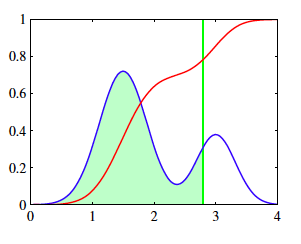

<center>图4.13 概率密度$p(\theta)$的合成例子如蓝色曲线所示，是通过两个高斯的混合给出的，同时其累计分布函数$f(a)$，如红色曲线所示。需要注意的是蓝色曲线任意点的值，比如蓝色曲线那样，对应着红色曲线在同一点的斜率。相反，此时红色曲线在这点的值对应着蓝色曲线所指定的绿色阴影区域的面积。在随机阈值模型中，类标签在$a=\mathbf{w}^{\mathsf{T}}\phi$超出阈值时，取值$t=1$，否则就取值$t=0$。这等价于由累计分布函数$f(a)$给出的激活函数的。</center>

举一个特殊例子，假设密度$p(\theta)$是由0均值，单位方差高斯给出的。其对应的累计分布函数是由如下给出的

$$\Phi(a) = \int_{-\infty}^a\mathcal{N}(\theta\mid 0,1)d\theta$$

这就是概率函数。它有着S型的形状，并与图4.9的逻辑sigmoid函数进行了比较。需要注意的是使用一个更加通用的高斯分布不会改变模型，因为这相当于线性系数$\mathbf{w}$重缩放。许多数值包提供了由如下定义的密切相关函数的评估

$$\text{erf}(a) = \frac{1}{\sqrt{\pi}}\int_0^a\text{exp}(-\theta^2/2)d\theta$$

这就是熟知的erf函数或错误函数（不要与机器学习模型中的误差函数混淆）。它通过如下关联到概率函数

$$\Phi(a)=\frac{1}{2}\left\{1+\frac{1}{\sqrt{2}}\text{erf}(a)\right\}$$

基于概率激活函数的广义线性模型被称作概率回归。

我们可以使用最大似然来定义这个模型的参数，通过一个等会儿会讨论的思想的直接扩展。实际上，使用概率回归发现的结果趋于与逻辑回归是相似的。当我们在第4.5节讨论逻辑回归的贝叶斯处理时，会找到概率模型的其它应用。

实际应用中发生的一个问题就是异常，它产生于度量输入向量$\mathbf{x}$的错误，或者是目标值$t$的误打标。因为这些点有很长一段在理想决策边界的错误一边，它们会严重扭曲分类器。需要注意的是逻辑和概率回归模型在表述上是不一样的，因为逻辑回归的尾部衰减是渐进式的，像$\text{exp}(-x)$对于$x \mapsto \infty$，然而对于概率激活函数，它们的衰减像$\text{exp}(-x)^2$，所以概率模型对异常更敏感。

逻辑和概率模型都会假设数据是被正确打标的。误打标的影响很容易通过引入一个概率$\epsilon$来纳入概率模型，它是目标值$t$被转换为错误值（Opper和Winther，2000a）的概率，导致的数据点$\mathbf{x}$的形式的目标值分布如下

$$\begin{align*}p(t\mid\mathbf{x}) &= (1-\epsilon)\sigma(\mathbf{x}) + \epsilon(1-\sigma(x))\\
&= \epsilon + (1-2\epsilon)\sigma(\mathbf{x})
\end{align*}$$

其中$\sigma(\mathbf{x})$是输入向量$\mathbf{x}$的激活函数。这里$\epsilon$可能会被事先设置，或者被当成超参数，从数据中进行推断。

#### 4.3.6 正则链函数

对于在高斯噪声分布中的线性回归模型，误差函数，其对应的负对数似然，是由3.12给出的。如果我们取对参数向量$\mathbf{w}$的导数，是从数据点$n$中误差函数的贡献，它取的是'误差'$y_n-t_n$乘以特征向量$\phi_n$的形式，其中$y_n=\mathbf{w}^{\mathsf{T}}\phi_n$。类似地，对于sigmoid激活函数和交叉熵误差函数4.90的组合，对于softmax激活函数函数与多分类交叉误差函数4.108，我们再次获得这个简单形式。我们现在证明这是对于目标变量来自指数家族的条分布假设的一个通用结果，同时其选择的对应的激活函数称作正则链函数。

我们再次使用指数家族分布的限制形式4.84。需要注意的是这里我们应用指数家族分布到目标变量$t$，与4.2.4节相比，我们将其应用到输入项链$\mathbf{x}$。我们因此考虑如下目标变量条件分布形式

$$p(t \mid \eta, s) = \frac{1}{s}h\Bigr(\frac{t}{s}\Bigr)g(\eta)\text{exp}\Bigr\{\frac{\eta t}{s}\Bigr\}$$

使用导致结果2.226的导数的同样的参数，我们看到条件均值$t$，我们表示成$y$，由如下给出

$$y=\mathbb{E}[t\mid\eta] = -s\frac{d}{d\eta}\ln g(\eta)$$

因此$y$和$\eta$必须相关，我们通过$\eta=\psi(y)$来表示这个相关性。

跟随Nelder和Wedderburn（1972年），我们定义一个广义线性模型它是一个输入（或特征）变量的线性组合的非线性函数

$$y = f(\mathbf{w}^{\mathsf{T}}\phi)$$

其中$f(\cdot)$在机器学习中是激活函数，$f^{-1}(\cdot)$在统计中是链接函数。

现在考虑这个模型的对数似然函数，作为$\eta$的函数，给出如下

$$\ln p(\mathbf{t}\mid\eta,s) = \sum_{n=1}^N\ln p(t_n\mid\eta, s) = \sum_{n=1}^N\left\{\ln g(\eta_n) + \frac{\eta_nt_n}{s}\right\} + \text{const}$$

其中我们假设所有的观测共享同一个缩放参数（比如高斯分布对应的噪声协方差），所以$s$是独立于$n$的。对参数$\mathbf{w}$的对数似然的导数给出如下

$$\begin{align*}\nabla_{\mathbf{w}}\ln p(\mathbf{t} \mid \eta, s) &= \sum_{n=1}^N\left\{\frac{d}{d\eta_n}\ln g(\eta_n) + \frac{t_n}{s}\right\}\frac{d\eta_n}{dy_n}\frac{dy_n}{da_n}\nabla a_n\\
&= \sum_{n=1}^N\frac{1}{s}\{t_n-y_n\}\psi'(y_n)f'(a_n)\phi_n
\end{align*}$$

其中$a_n=\mathbf{w}^{\mathsf{T}}\phi_n$，对于$\mathbb{E}[t\eta]$，我们使用了$y_n=f(a_n)$连通结果4.119。我们看到如果我们为$f^{-1}(y)$给出的链接函数选择一种特定的形式，则会有相当大的简化

$$f^{-1}(y)=\psi(y)$$

其中$f(\psi(y))=y$，因而$f'(\psi)\psi'(y)=1$。同样，因为$a=f^{-1}(y)$，我们有$a=\phi$，因而$f'(a)\psi'(y)=1$。在这个例子中，误差函数的梯度会退化为

$$\nabla\ln E(\mathbf{w}) = \frac{1}{s}\sum_{n=1}^N\{y_n-t_n\}\phi_n$$

对于高斯$s=\beta^{-1}$，而对于逻辑模型$s=1$。

#### 4.4 拉普拉斯近似

在4.5节，我们会讨论逻辑回归的贝叶斯处理。我们会看到，这比线性回归模型的贝叶斯处理要更复杂，在3.3和3.5节中讨论的。特别是，由于后验分布不再是高斯分布，我们就不能在参数向量$\mathbf{w}$上进行精确积分了。因此就有必要进入一些近似形式了。在本书的后面，我们也会考虑基于分析近似和数值采样的一系列的计数。

这里我们简单介绍一下，广泛使用的框架称作拉普拉斯近似，它的目的就是找到定义再一组连续变量上的概率密度的高斯近似。首先考虑但连续变量$z$的例子，假设分布$p(z)$由如下定义

$$p(z)=\frac{1}{Z}f(z)$$

其中$Z=\int f(z)dz$是正规系数。我们假设$Z$值是未知的。在拉普拉斯方法中目标是找到一个以分布$p(z)$模式为中心的高斯近似$q(z)$。首先第一步是找到$p(z)$模式，换句话说，就是这样的一个$p'(z_0)=0$的点$z_0$，或等价的

$$\frac{df(z)}{dz}\Biggr|_{z=z_0}=0$$

高斯分布有一个性质就是它的对数是变量的二次性函数。我们因此考虑以$z_0$为中心的$\ln p(z)$的泰勒扩展，则有

$$\ln f(z) \simeq \ln f(z_0) - \frac{1}{2}A(z-z_0)^2$$

其中

$$A=-\frac{d^2}{dz^2}\ln f(z)\Biggr|_{z=z_0}$$

需要注意的是如果$z_0$是分布的局部最大值的话，泰勒扩展的一阶项不会出现。取指数项我们互得到

$$f(z)\simeq\text{exp}\left\{-\frac{A}{2}\bigr(z-z_0\bigr)^2\right\}$$

然后，利用高斯归一化的标准结果，我们可以得到一个归一化分布$q(z)$，有

$$q(z) = \bigr(\frac{A}{2\pi}\bigr)^{1/2}\text{exp}\left\{-\frac{A}{2}\bigr(z-z_0\bigr)^2\right\}$$

拉普拉斯近似如图4.14所示。需要注意的是高斯近似只有在它的精度$A > 0$时，才能被很好地定义，换句话说，极值点$z_0$必须是局部最大值，所以在点$z_0$处的$f(z)$的二阶导是负数。

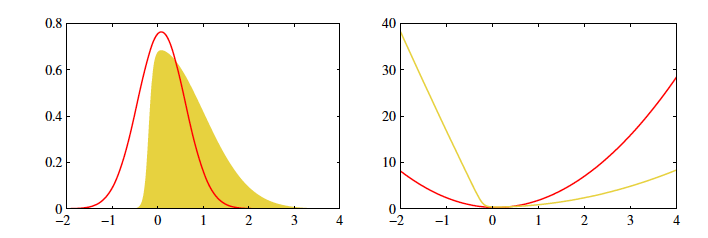

<center>图4.14 图中画的是应用分布$p(z)\propto\text{exp}(-z^2/2)\sigma(20z+4)$的拉普拉斯分布，其中$\sigma(z)$是逻辑sigmoid函数定义为$\sigma(z)=(1+e^{-z})^{-1}$。左图显示的正规化分布$p(z)$黄色表示，协同以$p(z)$的模$z_0$为中心的拉普拉斯近似红色表示。右图显示的是负对数对应的曲线。</center>

我们可以将拉普拉斯方法扩展到由$M$维空间$z$定义的近似分布$p(z)=f(z)/Z$。在极值点$z_0$处，$\nabla f(z)$的梯度会消失。在极值点出的展开我们有

$$\ln f(z) \simeq \ln f(z_0) - \frac{1}{2}(\mathbf{z}-\mathbf{z}_0)^{\mathsf{T}}A(\mathbf{z}-\mathbf{z}_0)$$

其中$M \times M$海森矩阵定义由

$$A = - \nabla\nabla\ln f(z)\bigr|_{z=z_0}$$

$\nabla$是梯度操作。两边取指数我们得到

$$f(\mathbf{z})\simeq\text{exp}\left\{-\frac{1}{2}(\mathbf{z}-\mathbf{z}_0)^{\mathsf{T}}A(\mathbf{z}-\mathbf{z}_0)\right\}$$

分布$q(\mathbf{z})$是与$f(\mathbf{z})$成比例的，其相应的标准化系数可以通过检查得到，对于标准化的多项高斯使用标准结果2.43，给出

$$q(\mathbf{z})=\frac{|\mathbf{A}|}{(2\pi)^{M/2}}\text{exp}\left\{-\frac{1}{2}(\mathbf{z}-\mathbf{z}_0)^{\mathsf{T}}A(\mathbf{z}-\mathbf{z}_0)\right\} = \mathcal{N}(\mathbf{z}\mid\mathbf{z}_0,\mathbf{A}^{-1})$$

其中$|\mathbf{A}|$代表的是$\mathbf{A}$的行列式。只要$\mathbf{A}$给出的精度矩阵是正定的，就可以很好地定义这种高斯分布，这意味着极值点$\mathbf{z}_0$必须是局部极大之，而不是极小值或鞍点。

为了应用拉普拉斯近似，我们先得找到模式$\mathbf{z}_0$，然后再该模式下评估海森矩阵。实际上，这个模式一般可以通过运行一些数值优化算法（Bishop和Nabney，2008年）找到。许多实践中涉及到的分布都是多元的，所以根据模考虑的不同会有不同的拉普拉斯近似。需要注意的是应用拉普拉斯方法并不需要知道真实分布的归一化常量$Z$，由于中心极限定理，随着观测数据点数的增加，模型的后验分布将越来越好地被高斯近似，因此在数据点数目相对较大的情况下，拉普拉斯近似是最有用的。

拉普拉斯最主要的缺陷是，它依赖于高斯分布，它只适用于实数变量。在其它例子中也可以应用拉普拉斯到变量的转换。例如，如果$0 \le \tau < \infty$，那么我们可以考虑$\ln \tau$的拉普拉斯近似。大多数拉普拉斯框架的最大局限，在于它是纯粹基于真实分布在指定变量值的各方面，所以很难捕捉到全局特性。在第10章，我们会考虑采用更全局的视角的替代方法。

#### 4.4.1 模型比较与BIC（贝叶斯信息标准）

同近似分布$p(\mathbf{z})$，我们也可以得到一个近似的归一化常量$Z$。使用近似4.133我们有

$$\begin{align*}
Z&=f(\mathbf{z})d\mathbf{z}\\
&\simeq f(\mathbf{z}_0)\int\text{exp}\bigr\{-\frac{1}{2}(\mathbf{z}-\mathbf{z}_0)^{\mathsf{T}}(\mathbf{z}-\mathbf{z}_0)\bigr\}d\mathbf{z}\\
&=f(\mathbf{z}_0)\frac{(2\pi)^{M/2}}{|\mathbf{A}|^{1/2}}
\end{align*}$$

其中我们注意到积分是高斯，使用的是对于标准化高斯分布的标准结果2.43。我们可以使用结果4.135得到模型证据的近似，如在3.4节讨论的，它在贝叶斯模型比较中起着重要作用。

考虑数据集$\mathcal{D}$和有着参数$\{\mathbf{\theta}_i\}$模型集$\{\mathcal{M}_i\}$。对于每个模型我们定义一个似然函数$p(\mathcal{D}\mid\mathbf{\theta}_i,\mathcal{M}_i)$。如果我们进入参数上的先验$p(\mathbf{\theta}_i\mid\mathcal{M}_i)$，那么我们感兴趣的是对于各种模型计算模型证据$p(\mathcal{D}\mid\mathcal{M}_i)$。从现在开始我们省略在$\mathcal{M}_i$上的条件来简化符号。从贝叶斯定理中模型证据是由如下给出的

$$p(\mathcal{D})=\int p(\mathcal{D}\mid\mathbf{\theta})p(\theta)d\theta$$

确定$f(\mathbf{\theta})=p(\mathcal{D}\mid\mathbf{\theta})p(\theta)$和$Z=p(\mathcal{D})$，我们得到

$$\ln p(\mathcal{D}) \simeq \ln p(\mathcal{D}\mid\mathbf{\theta}_{\text{MAP}}) + \underbrace{\ln p(\mathbf{\theta}_{\text{MAP}}) + \frac{M}{2}\ln(2\pi) - \frac{1}{2}\ln|\mathbf{A}|}_{\text{Occam factor}}$$

其中$\mathbf{\theta}_{\text{MAP}}$是在后验概率模式下的$\mathbf{\theta}$值，$\mathbf{A}$是负对数后验二阶导的海森矩阵

$$\mathbf{A} = -\nabla\nabla\ln p(\mathcal{D}\mid\mathbf{\theta}_{\text{MAP}})p(\mathbf{\theta}_{\text{MAP}}) = -\nabla\nabla\ln p(\mathbf{\theta}_{\text{MAP}}\mid\mathcal{D})$$

右边4.137中的第一项表示的是使用优化参数表示的对数似然评估，剩余三项组合成'Occam factor'用来惩罚模型复杂度。

如果我们假设参数上的高斯先验分布是宽泛的，且海森矩阵是满秩的，那么我们可以使用如下非常粗略的方法来近似

$$\ln p(\mathcal{D}) \simeq \ln p(\mathcal{D}\mid\mathbf{\theta}_{\text{MAP}}) - \frac{1}{2}M\ln N$$

其中$N$是数据点数，$M$是在$\mathbf{\theta}$上参数数，我们省略了加法常数项。这就是贝叶斯信息标准，或Schwarz标准（Schwarz，1978年）。需要注意的是，与1.73给出的AIC相比，这个对模型的惩罚则更重。

复杂性度量（如AIC和BIC）有着易于评估的优点，但也会给出误导性的结果。尤其，假设海森矩阵是满秩通常是无效的，因为许多参数并没有"很好地被定义"。我们可以使用结果4.137来得到更加精度的开始于拉普拉斯近似的模型证据的评估，如5.7节神经网络内容中描述的。

#### 4.5 贝叶斯逻辑回归

我们现在转到逻辑回归的贝叶斯处理。逻辑回归的精确被额意思推断是很难解决的。尤其是，对于后验分布的估计需要对先验分布和似然函数的乘积进行归一化，而似然函数本身就是逻辑sigmoid函数的乘积，每个数据点都有一个这样的函数。对预测分布的评估同样也是难以解决的。这里我们考虑贝叶斯逻辑回归（Spiegelhalter和Lauritzen，1990年；MacKay，1992b）拉普拉斯近似的应用。

#### 4.5.1 拉普拉斯近似

回想一下4.4节，拉普拉斯近似是通过找后验分布的模式，然后你和在该模式下的高斯中心得到的。这个需要对数后验二阶导的估计，这等价于找海森矩阵。

因为我们找的后验分布的高斯表达，很自然地会以高斯先验为开始，我们写下通用的形式

$$p(\mathbf{w}) = \mathcal{N}(\mathbf{w}\mid\mathbf{m}_0,\mathbf{S}_0)$$

其中$\mathbf{m}_0$和$\mathbf{S}_0$是固定的超参数。在参数$\mathbf{w}$上的后验分布有如下给出

$$p(\mathbf{w}\mid\mathbf{t}) \propto p(\mathbf{w})p(\mathbf{t}\mid\mathbf{w})$$

其中$\mathbf{t}=(t_1,\cdots,t_N)^{\mathsf{T}}$。两边取对数，使用4.140的先验分布将其带入，对于似然函数使用4.89，我们得到

$$\ln p(\mathbf{w} \mid \mathbf{t}) = -\frac{1}{2}(\mathbf{w}-\mathbf{m}_0)^{\mathsf{T}}\mathbf{S}_0^{-1}(\mathbf{w}-\mathbf{m}_0) + \sum_{n=1}^N\{t_n\ln y_n + (1-t_n)\ln(1-y_n)\} + \text{const}$$

其中$y_n=\sigma(\mathbf{w}^{\mathsf{T}}\phi_n)$。为了得到后验分布的高斯近似，我们先最大后验分布来给出MAP（最大后验）解$\mathbf{w}_{\text{MAP}}$，它定义了高斯的均值。协方差是由负对数似然二阶导的矩阵的逆给出的，取如下形式

$$\mathbf{S}_N = -\nabla\nabla\ln p(\mathbf{w} \mid \mathbf{t}) = \mathbf{S}_0^{-1} + \sum_{n=1}^Ny_n(1-y_n)\phi_n\phi_n^{\mathsf{T}}$$

后验概率的高斯近似因此取如下形式

$$q(\mathbf{w})=\mathcal{N}(\mathbf{w}\mid\mathbf{w}_{\text{MAP}},\mathbf{S}_N)$$

得到后验分布的高斯近似，剩下的任务就是对这个分布进行边缘化来预测。

#### 4.5.2 预测分布

对于类别$\mathcal{C}_1$的预测分布，给出一个新的特征向量$\phi(\mathbf{x})$，是通过边缘化其对应的后验分布$p(\mathbf{w}\mid\mathbf{t})$得到的它本身由高斯分布$q(\mathbf{w})$近似来的，所以

$$p(\mathcal{C}_1\mid\phi,\mathbf{t})=\int p(\mathcal{C}_1\mid\phi,\mathbf{w})p(\mathbf{w}\mid\mathbf{t})d\mathbf{w}\simeq\int\sigma(\mathbf{w}^{\mathsf{T}}\mathbf{\phi})q(\mathbf{w})d\mathbf{w}$$

其对应的类别$\mathcal{C}_2$的概率由$p(\mathcal{C}_2\mid\phi,\mathbf{t})=1-p(\mathcal{C}_1\mid\phi,\mathbf{t})$给出。为了评估预测分布，我们首先需要注意的是函数$\sigma(\mathbf{w}^{\mathsf{T}}\mathbf{\phi})$只依赖于$\mathbf{w}$在$\mathbf{\phi}$上的映射。用$a=\mathbf{w}^{\mathsf{T}}\mathbf{\phi}$表示，我们有

$$\sigma(\mathbf{w}^{\mathsf{T}}\mathbf{\phi})=\int\delta(a-\mathbf{w}^{\mathsf{T}}\mathbf{\phi})\sigma(a)da$$

其中$\delta(\cdot)$是狄拉克$\delta$函数。由此我们得到

$$\int\sigma(\mathbf{w}^{\mathsf{T}}\mathbf{\phi})q(\mathbf{w})d\mathbf{w} = \int\sigma(a)p(a)da$$

其中

$$p(a) = \int\delta(a-\mathbf{w}^{\mathsf{T}}\mathbf{\phi})q(\mathbf{w})d\mathbf{w}$$

我们可以通过注意$\delta$函数对$\mathbf{w}$施加线性约束，从而通过与$\mathbf{\phi}$正交的所有方向的积分的联合分布$q(\mathbf{w})$产生一个边缘分布，从而来评估$p(a)$。因为$q(\mathbf{w})$是高斯，我们从2.3.2节找那个知道，边缘分布也是高斯。我们通过取时间间隔，和交替在$a$和$\mathbf{w}$上积分来计算这个分布的均值和协方差，所以

$$\mu_a = \mathbb{E}[a]=\int p(a)ada = \int q(\mathbf{w})\mathbf{w}^{\mathsf{T}}\mathbf{\phi}d\mathbf{w} = \mathbf{w}^{\mathsf{T}}_{\text{MAP}}\mathbf{\phi}$$

其中我们用了变分后验分布$q(\mathbf{w})$的结果4.144。同样

$$\begin{align*}
\sigma_a^2&=\text{var}[a] = \int p(a)\{a^2-\mathbb{E}[a]^2\}da\\
&=\int q(\mathbf{w})\{(\mathbf{w}^{\mathsf{T}}\mathbf{\phi})^2-(\mathbf{m}_N^{\mathsf{T}}\mathbf{\phi})^2\}d\mathbf{w} = \mathbf{\phi}^{\mathsf{T}}\mathbf{S}_N\mathbf{\phi}
\end{align*}$$

需要注意的是$a$的分布取如线性回归模型的预测分布的同样形式，噪声方差设置为0。因此我们的变分近似的预测分布会变成

$$p(\mathcal{C}_1\mid\mathbf{t})=\int\sigma(a)p(a)da = \int\sigma(a)\mathcal{N}(a\mid\mu_a,\sigma_a^2)da$$

这个结果也可以直接通过使用2.3.2节中的边缘高斯分布的结果得到。

$a$上的积分表示高斯与逻辑sigmoid的卷积，是不能解析计算的。我们可以通过使用4.59定义的逻辑sigmoid函数$\sigma(a)$和4.114定义的概率函数$\Phi(a)$之间的相似性得到一个很好的近似（Spiegelhalter和Lauritzen，1990年；MacKay，1992b；Barber和Bishop，1998a）。为了得到逻辑函数的更好的近似，我们需要重新缩放水平轴，所以我们可以通过$\Phi(\lambda a)$来近似$\sigma(a)$。我们可以通过要求两个在原点处有着同样斜率的两个函数找到合理的$\lambda$值，它给出$\lambda^2=\pi/8$。逻辑sigmoid和概率函数的相似性，对于$\lambda$的选择，如图4.9所示。

使用概率函数的优点是，它的卷积高斯可以在另一个概率函数中分析表达出来。尤其我们可以证明如下

$$\int\Phi(\lambda a)\mathcal{N}(a\mid\mu,\sigma^2)da=\Phi\left(\frac{\mu}{(\lambda^{-2}+\sigma^2)^{1/2}}\right)$$

我们现在在等式的两边，应用近似$\sigma(a)\simeq\Phi(\lambda a)$到概率函数，会有下面高斯逻辑sigmoid卷积的近似

$$\int\sigma(a)\mathcal{N}(a\mid\mu,\sigma^2)da \simeq \sigma(\mathcal{K}(\sigma^2)\mu)$$

其中我们定义

$$\mathcal{K}(\sigma^2)=((1+\pi\sigma^2)/8)^{-1/2}$$

将这个结果应用到4.151，我们得到近似预测分布的形式

$$p(\mathcal{C}_1\mid\phi,\mathbf{t})=\sigma(\mathcal{K}(\sigma^2)\mu_a)$$

其中$\mu_a$和$\sigma_a^2$由4.149和4.150各自定义，$\mathcal{K}(\sigma^2)$由4.154定义。

需要注意的是对应的$p(\mathcal{C}_1\mid\phi,\mathbf{t})=0.5$的决策边界是由$\mu_a=0$给出的，这与使用$\mathbf{w}$的$\text{MAP}$值得到的是同样的决策边界。因此如果决策标准是基于最小误分类率，等价于先验概率，那么$\mathbf{w}$上的边缘化是无效的。但对于更复杂的决策标准，它起着重要的作用。在后验概率的高斯近似下的边缘化逻辑simgoid模型如图10.13中画的变分推断中的内容。